In [293]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [294]:
import os

class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'O', 'P', 'Q', 'R', 'U', 'V', 'W', 'X', 'Y']
class_names_label = {class_name:i for i,class_name in enumerate(class_names)}

nb_classes = len(class_names)
print(class_names_label)
IMAGE_SIZE = (50,50)

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'K': 9, 'L': 10, 'O': 11, 'P': 12, 'Q': 13, 'R': 14, 'U': 15, 'V': 16, 'W': 17, 'X': 18, 'Y': 19}


In [295]:
def load_data():
    datasets = ['/content/drive/MyDrive/machine learning/Crop/']   #path where your dataset is stored
    
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        for folder in os.listdir(dataset):#subfolder
            label = class_names_label[folder]
            
            for file in os.listdir(os.path.join(dataset,folder)):
                if file[-3:] in {'jpg','png'}:
                    img_path = os.path.join(os.path.join(dataset,folder),file)
                    
                    image = Image.open(img_path)
                    image = image.convert('RGB')
                    image = image.resize(IMAGE_SIZE)
                    
                    images.append(image)
                    labels.append(label)

        images = np.array([np.array(image) for image in images])
        labels = np.array([np.array(label) for label in labels])    
        
    return images,labels

In [296]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [297]:
(X,y) = load_data()

Loading /content/drive/MyDrive/machine learning/Crop/


In [298]:
print(X.shape)
print(y.shape)

(2400, 50, 50, 3)
(2400,)


In [299]:
type(X)

numpy.ndarray

In [300]:
from sklearn.model_selection import train_test_split

x_train_val, x_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.25, random_state=42)

In [301]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1440, 50, 50, 3)
(1440,)
(480, 50, 50, 3)
(480,)


In [302]:
x_train = x_train/255
x_val = x_val/255
x_test = x_test/255


In [303]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1440, 50, 50, 3)
(1440,)
(480, 50, 50, 3)
(480,)


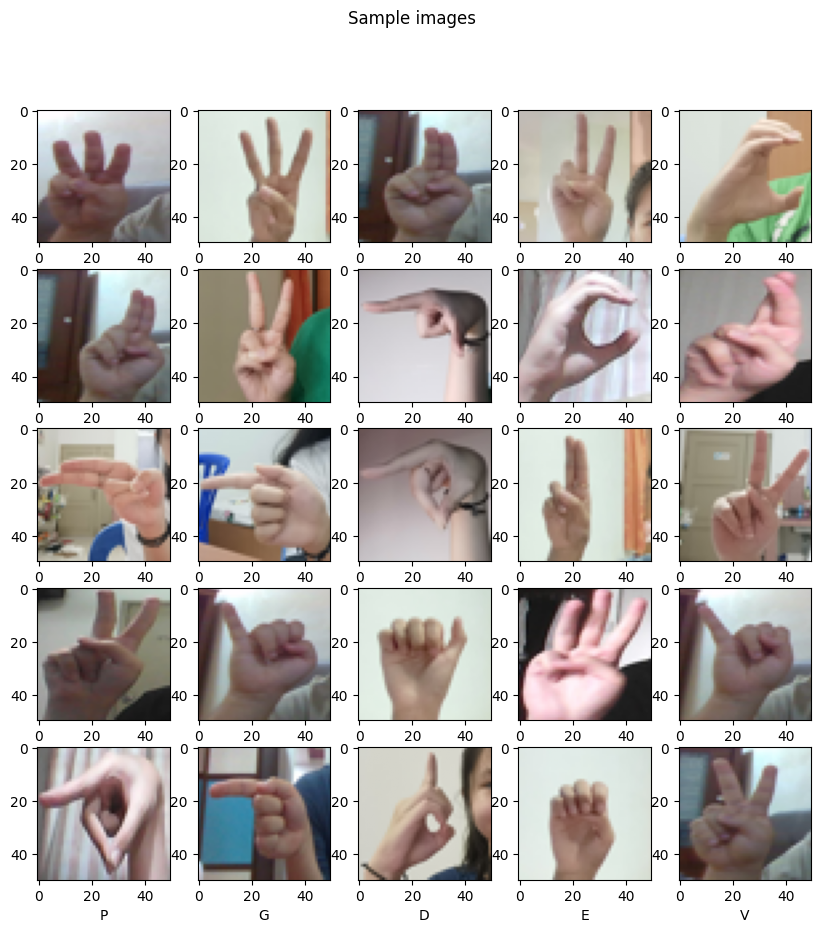

In [304]:
fig = plt.figure(figsize = (10,10))
fig.suptitle('Sample images')
for i in range(25):
    plt.subplot(5,5,i+1)
#   plt.xticks =([])
#   plt.yticks = []
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i]])

In [305]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1440, 50, 50, 3)
(1440,)
(480, 50, 50, 3)
(480,)


In [306]:
x_train_flat = x_train.reshape(-1,50*50*3)
x_val_flat = x_val.reshape(-1,50*50*3)
x_test_flat = x_test.reshape(-1,50*50*3)

In [307]:
# Perform PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=300) 
x_train_flat = pca.fit_transform(x_train_flat)
x_val_flat = pca.transform(x_val_flat)
x_test_flat = pca.transform(x_test_flat)

In [308]:
print(x_train_flat.shape)
print(y_train.shape)
print(x_val_flat.shape)
print(y_val.shape)
print(x_test_flat.shape)
print(y_test.shape)

(1440, 300)
(1440,)
(480, 300)
(480,)
(480, 300)
(480,)


In [309]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Train the KNN model and determine optimal hyperparameters
best_accuracy = 0
best_k = 0

# Hyperparameter tuning loop
for k in range(1, 100):
    # Train the KNN model
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_flat, y_train)

    # Validate the model on the validation set
    y_val_pred = knn.predict(x_train_flat)
    accuracy = accuracy_score(y_train, y_val_pred)
    
    # Check if the current model is the best based on validation accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print(best_k)

1


In [310]:
knn = KNeighborsClassifier(n_neighbors=best_k)
print(cross_val_score(knn, x_train_flat, y_train, cv=5, scoring='accuracy').mean())

0.8236111111111111


In [311]:
from sklearn.model_selection import GridSearchCV
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', return_train_score=False)
grid.fit(x_train_flat, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=1),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='accuracy')

In [312]:
grid_mean_scores = grid.cv_results_['mean_test_score']
print(grid_mean_scores)

[0.82361111 0.79722222 0.8        0.79236111 0.78541667 0.76875
 0.75902778 0.75694444 0.74444444 0.73819444 0.73611111 0.73263889
 0.73055556 0.72291667 0.71458333 0.70486111 0.70347222 0.69513889
 0.68958333 0.68263889 0.66597222 0.65902778 0.65347222 0.65347222
 0.64722222 0.62708333 0.61319444 0.60416667 0.59652778 0.57777778
 0.57152778 0.56527778 0.55138889 0.53958333 0.52638889 0.51666667
 0.51111111 0.50694444 0.50069444 0.49722222 0.48125    0.47708333
 0.47291667 0.46736111 0.46388889 0.45486111 0.45       0.43819444
 0.42361111 0.42291667 0.41944444 0.41111111 0.4        0.39513889
 0.38472222 0.38125    0.37638889 0.37569444 0.37013889 0.36319444
 0.35902778 0.35555556 0.35277778 0.34583333 0.34375    0.33680556
 0.33402778 0.33125    0.33125    0.32986111 0.32222222 0.32152778
 0.32083333 0.31597222 0.31666667 0.31388889 0.30902778 0.30625
 0.29861111 0.29930556 0.29722222 0.29583333 0.29305556 0.29513889
 0.29166667 0.29097222 0.28125    0.27708333 0.27291667 0.26736111
 

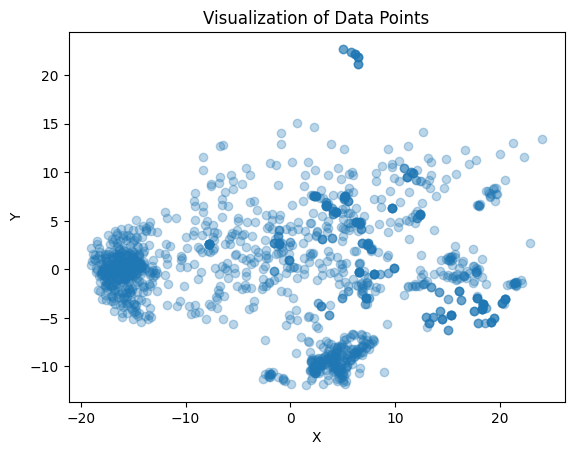

In [313]:
import matplotlib.pyplot as plt

# Plotting all data points with transparency
plt.scatter(x_train_flat[:, 0], x_train_flat[:, 1], alpha=0.3)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Visualization of Data Points')
plt.show()


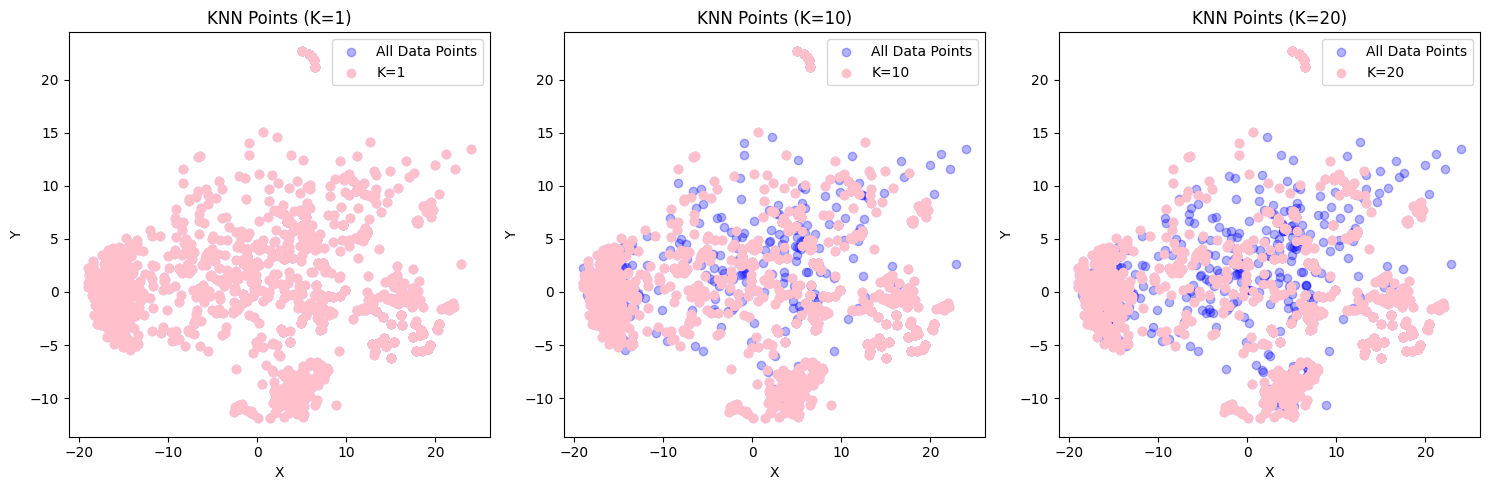

In [314]:
import matplotlib.pyplot as plt
import numpy as np

k_values = [1, 10, 20]  # List of K values to visualize

fig, axes = plt.subplots(1, len(k_values), figsize=(15, 5))  # Create a figure with one row and len(k_values) columns

for i, k in enumerate(k_values):
    # Create and fit the KNN model
    clf =KNeighborsClassifier(n_neighbors=k)
    clf.fit(x_train_flat, y_train)
    
    # Perform KNN prediction on the training data
    y_pred = clf.predict(x_train_flat)
    
    # Get the indices of points involved in the KNN calculation
    indices = np.where(y_pred == y_train)[0]
    
    # Plotting all data points with transparency
    axes[i].scatter(x_train_flat[:, 0], x_train_flat[:, 1], color='blue', alpha=0.3, label='All Data Points')
    
    # Plotting the points involved in the KNN calculation
    axes[i].scatter(x_train_flat[indices, 0], x_train_flat[indices, 1], color='pink', label=f'K={k}')
    
    axes[i].set_xlabel('X')
    axes[i].set_ylabel('Y')
    axes[i].set_title(f'KNN Points (K={k})')
    axes[i].legend()

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


In [315]:
#Performance comparison by score mean
from sklearn.model_selection import cross_val_score

knn=KNeighborsClassifier(best_k)

scores=cross_val_score(knn,x_train_flat,y_train,cv=5)#cv=fold

print(scores)
print("scores mean:",scores.mean())

[0.8125     0.80555556 0.8125     0.83680556 0.85069444]
scores mean: 0.8236111111111111


Text(0, 0.5, 'Cross-Validated Accuracy')

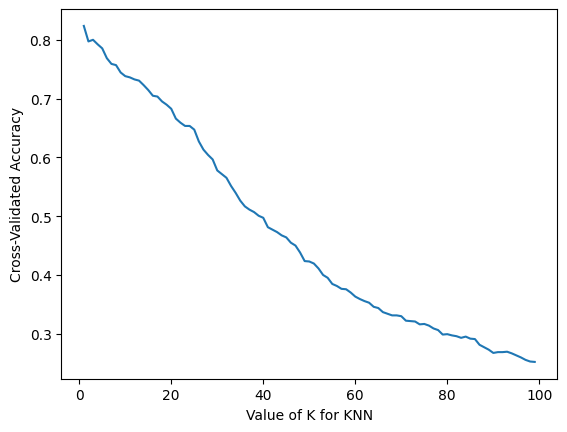

In [317]:
#grid_mean_scores 
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [318]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.8236111111111111
{'n_neighbors': 1}
KNeighborsClassifier(n_neighbors=1)


In [319]:
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.823611,0.017208,{'n_neighbors': 1}
1,0.797222,0.018840,{'n_neighbors': 2}
2,0.800000,0.014991,{'n_neighbors': 3}
3,0.792361,0.023178,{'n_neighbors': 4}
4,0.785417,0.018029,{'n_neighbors': 5}
...,...,...,...
94,0.263194,0.025553,{'n_neighbors': 95}
95,0.259722,0.027287,{'n_neighbors': 96}
96,0.255556,0.028683,{'n_neighbors': 97}
97,0.252778,0.024395,{'n_neighbors': 98}


In [320]:
print(grid.best_score_)
print(grid.best_params_)

0.8236111111111111
{'n_neighbors': 1}


Epoch 1/10
45/45 [==============================] - 1s 6ms/step - loss: 72.7987 - val_loss: 29.0713
Epoch 2/10
45/45 [==============================] - 0s 3ms/step - loss: 23.3017 - val_loss: 20.0993
Epoch 3/10
45/45 [==============================] - 0s 3ms/step - loss: 14.8484 - val_loss: 16.2949
Epoch 4/10
45/45 [==============================] - 0s 3ms/step - loss: 10.4433 - val_loss: 14.3000
Epoch 5/10
45/45 [==============================] - 0s 3ms/step - loss: 8.0629 - val_loss: 13.3077
Epoch 6/10
45/45 [==============================] - 0s 3ms/step - loss: 6.2798 - val_loss: 12.6586
Epoch 7/10
45/45 [==============================] - 0s 4ms/step - loss: 5.0077 - val_loss: 12.4272
Epoch 8/10
45/45 [==============================] - 0s 3ms/step - loss: 3.9341 - val_loss: 12.2609
Epoch 9/10
45/45 [==============================] - 0s 3ms/step - loss: 3.1445 - val_loss: 11.8538
Epoch 10/10
45/45 [==============================] - 0s 3ms/step - loss: 2.4876 - val_loss: 11.5676


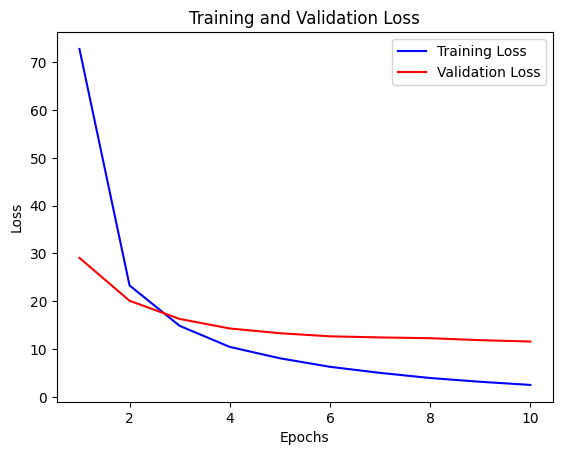

In [321]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import MeanSquaredError
from sklearn.metrics import mean_squared_error

# Define the number of features in your input data
input_dim = x_train_flat.shape[1]

# Define the architecture of the MLP model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(input_dim,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model with MSE loss function
model.compile(loss=MeanSquaredError(), optimizer='adam')

# Train the model
history = model.fit(x_train_flat, y_train, epochs=10, batch_size=32, validation_data=(x_val_flat, y_val))

# Get the training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the training and validation loss
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()




In [322]:
print("Best k in knn is:",best_k)
#since after comparison the best k is still the same k=1
# Rebuild the model using the best hyperparameters 
knn = KNeighborsClassifier(n_neighbors=best_k)

knn.fit(x_train_flat,y_train)
pred=knn.predict(x_train_flat)
print("Training acc:",accuracy_score(y_train,pred))

pred=knn.predict(x_val_flat)
print("Validation acc:",accuracy_score(y_val,pred))

pred_test=knn.predict(x_test_flat)
print("Testing acc:",accuracy_score(y_test,pred_test))

Best k in knn is: 1
Training acc: 1.0
Validation acc: 0.79375
Testing acc: 0.8666666666666667


In [323]:
#tested for using RandomForestClassifier but tested a lower accuracy
#from sklearn.model_selection import GridSearchCV
#from sklearn.ensemble import RandomForestClassifier

#params={'n_estimators':[30,40,50],
#        'max_depth':[9,11,13,15],
#        'max_features':[0.5,0.2,0.3]}
#'n_neighbors':[1,3,5,7]

#clf=GridSearchCV(rf,params,cv=5)

#clf.fit(x_train_flat,y_train)

In [324]:
from sklearn.metrics import classification_report

print(classification_report(y_test,pred_test,labels=knn.classes_.tolist()))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        25
           1       0.92      0.85      0.88        26
           2       0.90      0.95      0.93        20
           3       0.95      0.86      0.90        21
           4       0.88      0.93      0.90        30
           5       0.72      0.88      0.79        24
           6       0.81      0.84      0.82        25
           7       0.96      0.74      0.84        31
           8       0.92      0.92      0.92        25
           9       0.92      0.92      0.92        24
          10       0.85      1.00      0.92        17
          11       0.92      0.85      0.88        27
          12       1.00      0.88      0.94        26
          13       0.89      1.00      0.94        24
          14       0.75      0.75      0.75        20
          15       0.79      0.90      0.84        30
          16       0.77      0.83      0.80        24
          17       0.85    

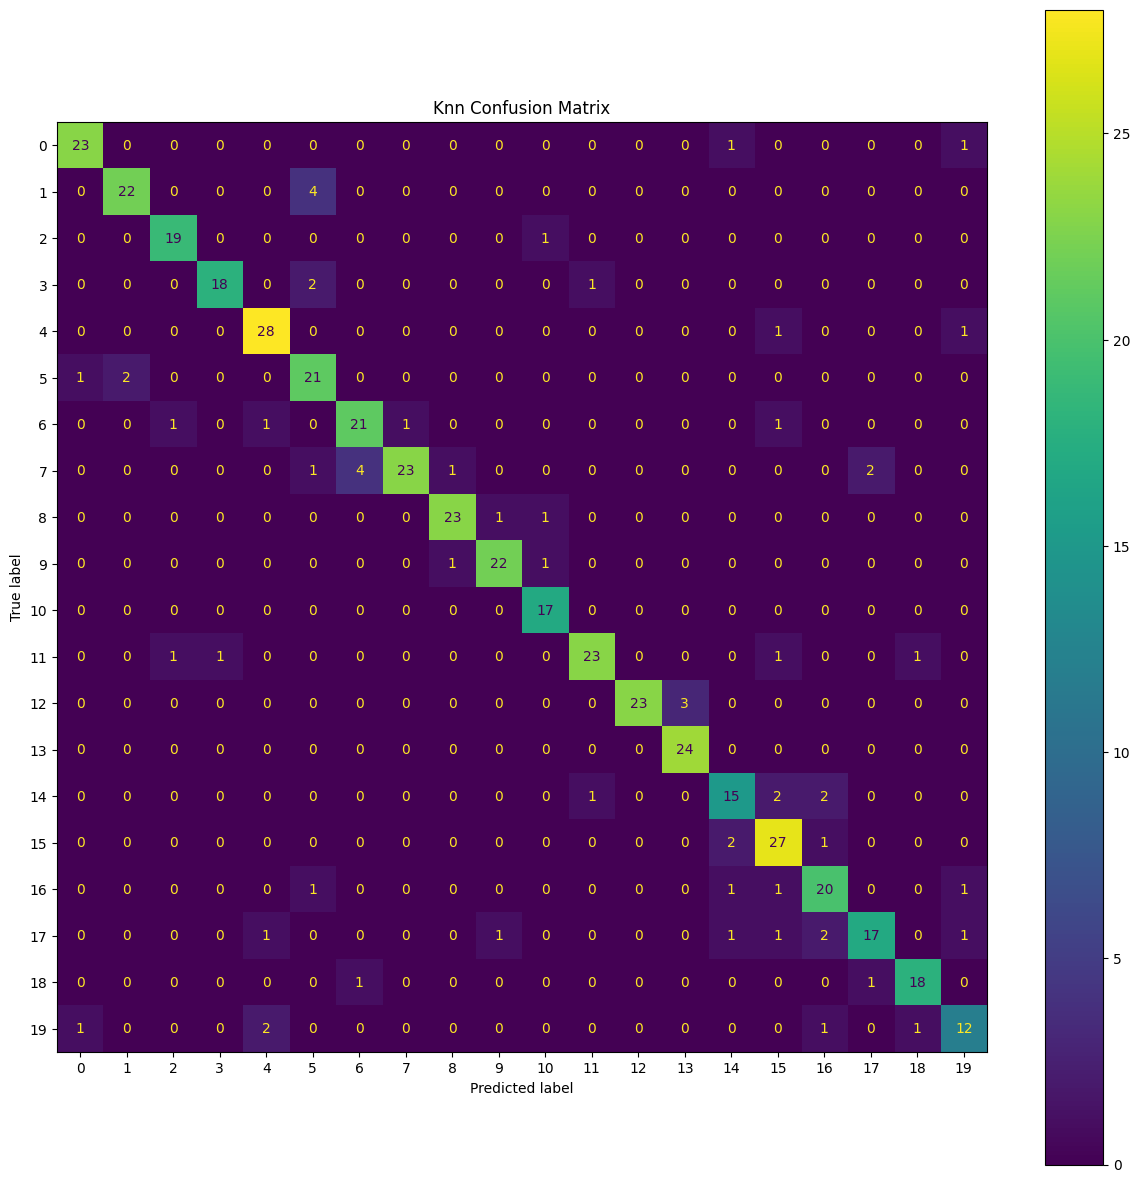

In [325]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test,pred_test,labels = knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=knn.classes_)

fig, ax = plt.subplots(figsize=(15,15))
ax.set_title('Knn Confusion Matrix')
disp.plot(ax=ax)
plt.show()

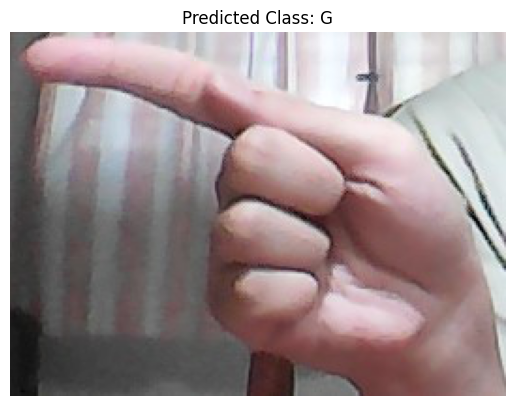

In [329]:

import random

parent_folder = '/content/drive/MyDrive/machine learning/Crop/' 
subfolders = [f.path for f in os.scandir(parent_folder) if f.is_dir()]
random_subfolder = random.choice(subfolders)
image_files = [f.path for f in os.scandir(random_subfolder) if f.is_file() and f.name.endswith(('.jpg', '.jpeg', '.png'))]

# Select a random image
random_image_path = random.choice(image_files)

# Open the random image
random_image = Image.open(random_image_path)

# Preprocess the image
random_image_c = random_image.convert('RGB')
random_image_c = random_image.resize(IMAGE_SIZE)
random_image_c= np.array(random_image_c)
random_image_c=random_image_c/255
random_image_flat =random_image_c.reshape(-1,50*50*3)
random_image_flat=pca.transform(random_image_flat)

# Classify the image using the trained SVC model
predicted_class_index = knn.predict(random_image_flat)[0]

# Determine the corresponding class name
predicted_class_name = class_names[predicted_class_index]

# Display the image and predicted class name
fig, ax = plt.subplots()

ax.imshow(random_image)
ax.set_title('Predicted Class: ' + predicted_class_name)
ax.axis('off')

plt.show()